###**Task1: Word Similarity and Analogy**

In [ ]:
!pip install gensim spacy
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Install gensim for Word2Vec and spacy for general NLP processing.
Download pre-trained GloVe vectors and Word2Vec embeddings.**

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2025-02-10 10:47:59--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-02-10 10:47:59--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-02-10 10:47:59--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

###**1. Word Similarity with GloVe**

using the 6B tokens, 50-dimensional embeddings.

In [ ]:
import numpy as np
import gensim.downloader as api
from scipy.spatial.distance import cosine

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings
glove_embeddings = load_glove_embeddings('glove.6B.50d.txt')

In [ ]:
def get_word_vector(word, embeddings):
    return embeddings.get(word, None)

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

In [ ]:
vec1 = get_word_vector("king", glove_embeddings)
vec2 = get_word_vector("queen", glove_embeddings)
similarity_glove = cosine_similarity(vec1, vec2)
print(f"Similarity between king and queen (GloVe): {similarity_glove}")

Similarity between king and queen (GloVe): 0.7839043736457825


###**2. Word Similarity with Word2Vec**

Using the 300-dimensional vectors

In [ ]:
import gensim.downloader as api
word2vec_model = api.load("word2vec-google-news-300")

word1, word2 = "king", "queen"
similarity_word2vec = word2vec_model.similarity(word1, word2)
print(f"Similarity between {word1} and {word2} (Word2Vec): {similarity_word2vec}")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Similarity between king and queen (Word2Vec): 0.6510956883430481


###**3. Word Analogy Task**

####**3.1. Glove Analogy task**

GloVe doesn’t have built-in analogy functionality like Word2Vec. I compute the vector arithmetic manually and then find the closest word.

In [ ]:
def analogy_task(word_a, word_b, word_c, glove_embeddings):
    vector_a = get_word_vector(word_a, glove_embeddings)
    vector_b = get_word_vector(word_b, glove_embeddings)
    vector_c = get_word_vector(word_c, glove_embeddings)

    if vector_a is None or vector_b is None or vector_c is None:
        print("One or more words not found in the GloVe embeddings.")
        return

    analogy_vector = vector_a - vector_b + vector_c

    closest_word = None
    closest_similarity = float('inf')
    for word, vector in glove_embeddings.items():
        similarity = cosine(analogy_vector, vector)
        if similarity < closest_similarity:
            closest_similarity = similarity
            closest_word = word

    return closest_word

result_word_glove = analogy_task("king", "man", "woman", glove_embeddings)
print(f"Analogy result (GloVe): {result_word_glove}")

Analogy result (GloVe): king


####**3.2. Word2vec analogy task**

For solving word analogies, we use vector arithmetic.

In [ ]:
result_word2vec = word2vec_model.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
predicted_word = result_word2vec[0][0]
print(f"Analogy result (Word2Vec): {predicted_word}")

Analogy result (Word2Vec): queen


###**Task2: Visualization of Word Embeddings**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random

####**PCA and t-SNE**

In [ ]:
def reduce_dimensions(embeddings, method="PCA", n_components=2):
    words = list(embeddings.keys())
    vectors = np.array([embeddings[word] for word in words])

    if method == "PCA":
        model = PCA(n_components=n_components)
        reduced = model.fit_transform(vectors)
    elif method == "t-SNE":
        model = TSNE(n_components=n_components)
        reduced = model.fit_transform(vectors)
    else:
        raise ValueError("Method must be 'PCA' or 't-SNE'.")

    return reduced, words

####**Embeddings visualization**

In [ ]:
def visualize_embeddings(reduced, words, title="Word Embeddings Visualization"):
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced[:, 0], reduced[:, 1], c='blue', edgecolors='k', alpha=0.5)

    for i, word in enumerate(words):
        plt.text(reduced[i, 0], reduced[i, 1], word, fontsize=9)

    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

def select_words(embedding, n_words=100):
    if isinstance(embedding, dict):
        words = random.sample(list(embedding.keys()), n_words)
    else:
        words = random.sample(embedding.index_to_key, n_words)
    return {word: embedding[word] for word in words}

####**Embeddings of word2vec**

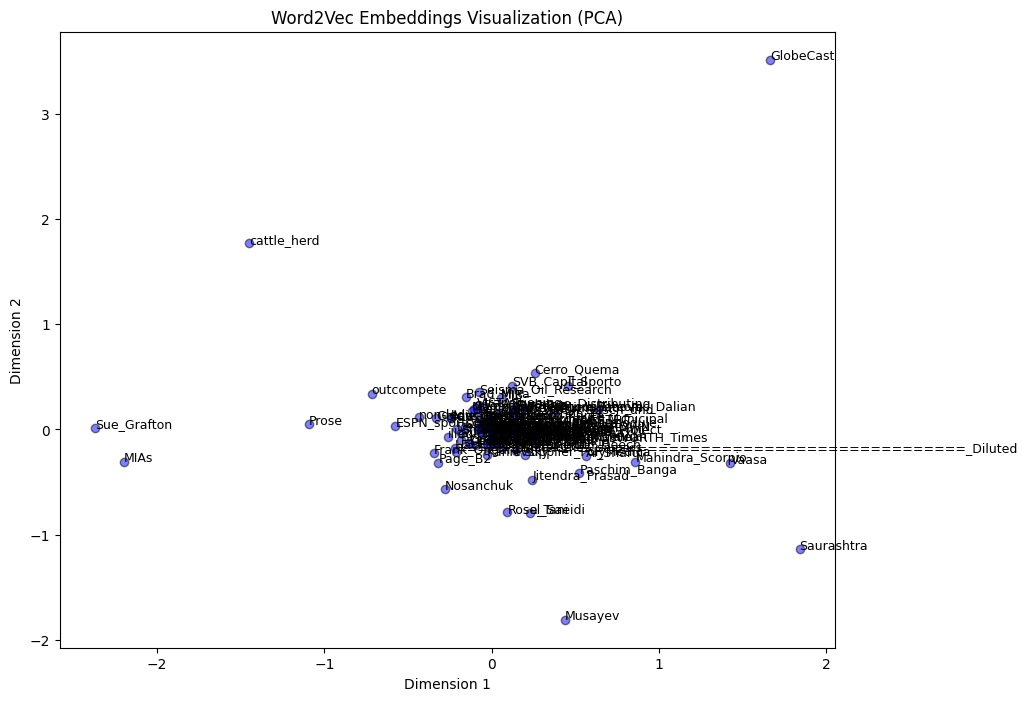

In [ ]:
selected_words_word2vec = select_words(word2vec_model, n_words=100)
reduced_word2vec, words_word2vec = reduce_dimensions(selected_words_word2vec, method="PCA")
visualize_embeddings(reduced_word2vec, words_word2vec, title="Word2Vec Embeddings Visualization (PCA)")

####**Embeddings of Glove**

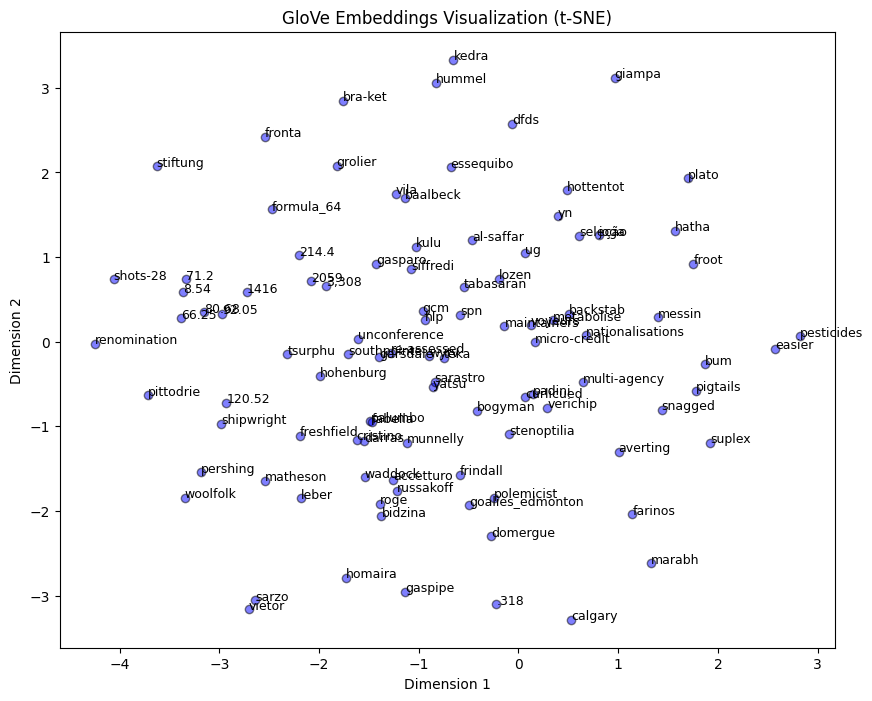

In [ ]:
selected_words_glove = select_words(glove_embeddings, n_words=100)
reduced_glove, words_glove = reduce_dimensions(selected_words_glove, method="t-SNE")
visualize_embeddings(reduced_glove, words_glove, title="GloVe Embeddings Visualization (t-SNE)")

###**Task3: Text Classification Using Word Embeddings**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def text_to_embeddings(text, embeddings, method='Word2Vec'):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Get the word vectors for each token
    vectors = []
    for token in tokens:
        if method == 'Word2Vec':
            if token in word2vec_model:
                vectors.append(word2vec_model[token])
        elif method == 'GloVe':
            if token in embeddings:
                vectors.append(embeddings[token])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(300)

In [ ]:
data = {
    'text': [
        'I love programming in Python',
        'This movie is amazing!',
        'I hate waiting in long lines',
        'The weather is terrible today',
        'Python is my favorite language',
        'I enjoy watching soccer on weekends'
    ],
    'label': [1, 1, 0, 0, 1, 1]  # 1 for positive sentiment, 0 for negative sentiment
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

####**Model performance for Word2vec**

In [ ]:
method = 'Word2Vec'
X = np.array([text_to_embeddings(text, glove_embeddings if method == 'GloVe' else word2vec_model, method) for text in df['text']])
y = np.array(df['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


####**Model performance for Glove**

In [ ]:
method2 = 'GloVe'
X = np.array([text_to_embeddings(text, glove_embeddings if method2 == 'GloVe' else word2vec_model, method) for text in df['text']])
y = np.array(df['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
